# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [36]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-19 16:44:54--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-19 16:44:54--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.2’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [37]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [38]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [39]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [40]:
# Resumen del conjunto de datos
data.shape

(1914, 2)

In [41]:
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [42]:

# Contar la cantidad de tweets por etiqueta
data['Label'].value_counts()

,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Del total de tweets, aproximadamente el 83.4% son non-biased y el 16.6% son biased. Esta proporción indica que el conjunto de datos está desbalanceado, lo cual es importante porque puede afectar el rendimiento de los modelos de análisis de texto. En este caso, el modelo podría aprender con mayor facilidad a reconocer los tweets non-biased y tener más dificultades para identificar los biased

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [43]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [44]:
data['Contents'] = data['Contents'].apply(limpiar_texto)
data.head()

,Contents,Label
0,"[chumeltorres, cabrón, tí, reciben, noticias, ...",biased
1,"[alguien, tan, amable, ir, hacerme, compra, ma...",non-biased
2,"[jenniferduquee, hahaha, si, rico, nadamas, fa...",non-biased
3,"[evagelcot, ves, programa, favorito, sólo, enc...",non-biased
4,"[siempre, tortilla, triunfa, mas, platos, play...",non-biased


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

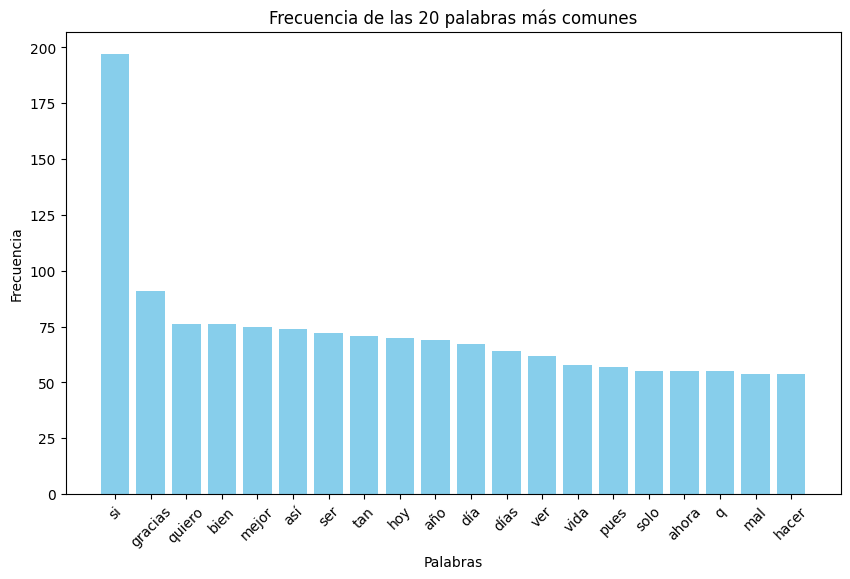

In [49]:
# Función para contar palabras (adaptada porque Contents ya es una lista de palabras)
def contar_palabras(listas_de_palabras):
    todas = []
    for lista in listas_de_palabras:   # cada elemento es ['hola','como','estas']
        todas.extend(lista)            # une todas las palabras en una sola lista
    return Counter(todas)

# Obtener frecuencias de palabras en todo el dataset
frecuencias = contar_palabras(data['Contents'])

# Seleccionar las 20 palabras más comunes
mas_comunes = frecuencias.most_common(20)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(
    [palabra for palabra, _ in mas_comunes],
    [freq for _, freq in mas_comunes],
    color='skyblue'
)
plt.title('Frecuencia de las 20 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

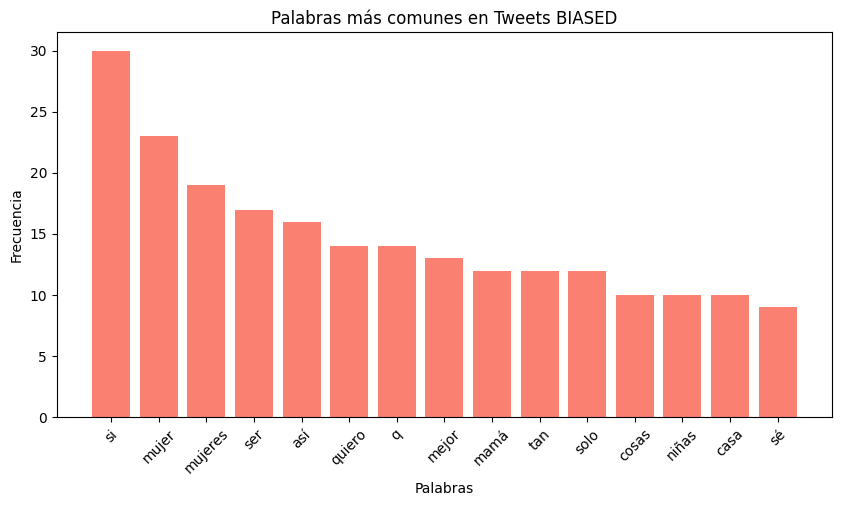

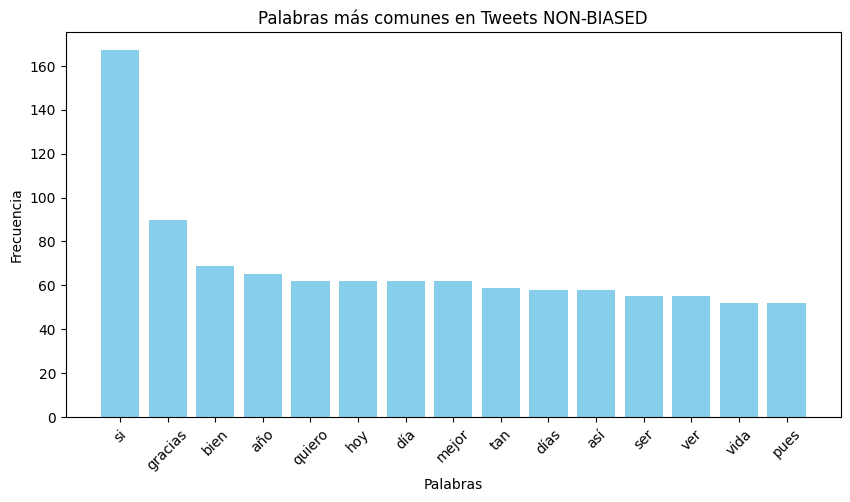

In [50]:

# 1. Separar tweets por etiqueta
biased = data[data['Label'] == 'biased']['Contents']
non_biased = data[data['Label'] == 'non-biased']['Contents']

# 2. Función para contar palabras
def contar_palabras(listas):
    todas = []
    for lista in listas:
        todas.extend(lista)
    return Counter(todas)

# 3. Contar palabras
freq_biased = contar_palabras(biased)
freq_non_biased = contar_palabras(non_biased)

# 4. Tomar las 15 palabras más comunes de cada grupo
top_biased = freq_biased.most_common(15)
top_non_biased = freq_non_biased.most_common(15)

# -----------------------------
# GRÁFICA PARA BIASED
# -----------------------------
plt.figure(figsize=(10,5))
plt.bar(
    [p for p, _ in top_biased],
    [f for _, f in top_biased],
    color='salmon'
)
plt.title("Palabras más comunes en Tweets BIASED")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# GRÁFICA PARA NON-BIASED
# -----------------------------
plt.figure(figsize=(10,5))
plt.bar(
    [p for p, _ in top_non_biased],
    [f for _, f in top_non_biased],
    color='skyblue'
)
plt.title("Palabras más comunes en Tweets NON-BIASED")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

**Respuesta 1**: En los tweets biased aparecen con frecuencia palabras  como “mujer”, “mujeres”, “mamá”, “niñas” y “casa”.
En cambio, los tweets non-biased contienen palabras como “sí”, “gracias”, “bien”, “año”, “hoy”, “día”, “ver” y “vida”.

**Respuesta 2:** Sí.
Las palabras “mujer”, “mujeres”, “mamá”, “niñas” y “casa” sugieren un sesgo porque están asociadas a estereotipos de género y roles tradicionales.
Estas palabras aparecen repetidamente en los tweets biased y casi no están presentes en los non-biased, lo que indica que el sesgo está ligado a comentarios sobre mujeres o roles domésticos.

**Respuesta 3**: Las empresas pueden usar esta información para:
- Detectar de forma temprana lenguaje discriminatorio relacionado con género en redes sociales.
- Entrenar modelos de moderación para identificar palabras que suelen aparecer en mensajes sesgados.
- Mejorar su comunicación, evitando mensajes que refuercen estereotipos o generen polémica.
- Diseñar campañas más inclusivas, al entender qué temas generan sesgo y cuáles no.
En general, este análisis ayuda a que las empresas mantengan una imagen respetuosa y consciente sobre temas sociales.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [53]:
## Cree una funcion para geenrar nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para generar nube de palabras
def generar_nube(palabras, titulo):
    texto = " ".join(palabras)  # Convertimos lista → string
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

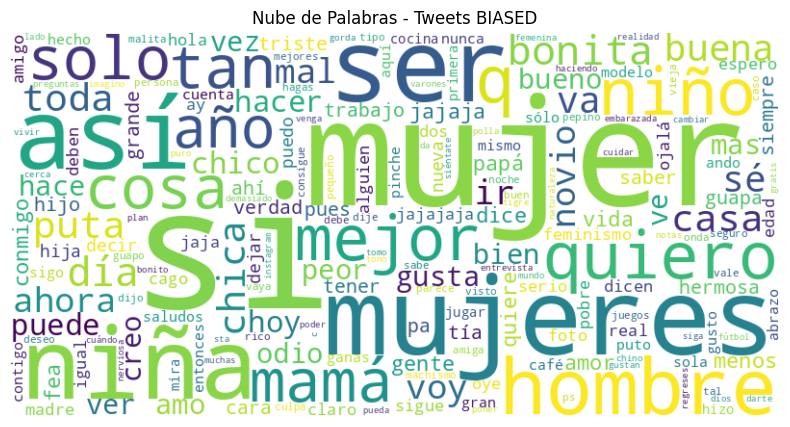

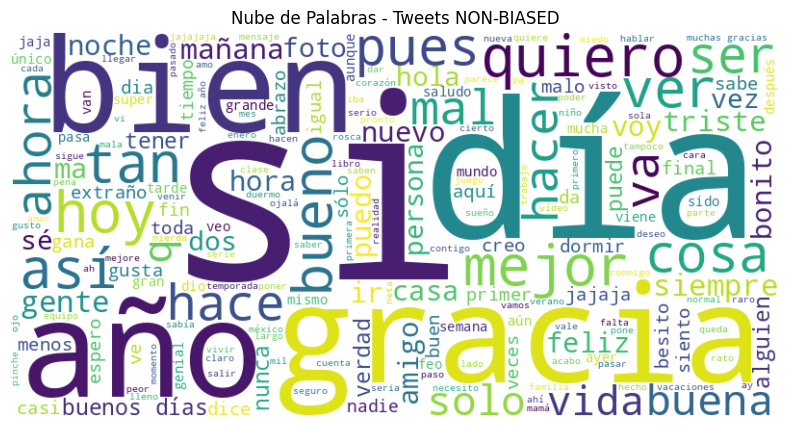

In [54]:
# Generar nube de palabras para cada conjunto
# Separar tweets biased y non-biased
biased = data[data['Label'] == 'biased']['Contents']
non_biased = data[data['Label'] == 'non-biased']['Contents']

# Convertir listas de listas → una sola lista
palabras_biased = [p for lista in biased for p in lista]
palabras_non_biased = [p for lista in non_biased for p in lista]

# Generar nubes
generar_nube(palabras_biased, "Nube de Palabras - Tweets BIASED")
generar_nube(palabras_non_biased, "Nube de Palabras - Tweets NON-BIASED")


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

**Respuest 1:** El análisis de texto permite identificar el tipo de lenguaje que utilizan los usuarios y los temas que más mencionan.
Con esta información, una marca puede adaptar su comunicación para: Usar un lenguaje más cercano y alineado con las palabras que los usuarios emplean de manera positiva y evitar términos que puedan asociarse a sesgos, conflictos o estereotipos detectados en los tweets.

**Respuesta 2**: i la mayoría de los tweets tienen sesgos, es importante que la campaña de marketing se revise para no reforzar esas mismas ideas. En ese caso, se debería cuidar más el lenguaje que se usa y optar por mensajes más neutrales e inclusivos. También sería necesario revisar cuidadosamente el contenido antes de publicarlo para evitar frases que se puedan malinterpretar.

**Respuesta 3**: En un análisis futuro sería interesante observar cómo cambian las palabras y los temas a lo largo del tiempo, porque eso permite identificar tendencias. También se podría analizar el sentimiento de cada grupo de tweets y explorar qué temas generan mayor sesgo.